In [91]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
WorldHappiness_2015 = pd.read_csv("2015.csv")   # Hold the World Happiness of 2015

WorldHappiness_2016 = pd.read_csv("2016.csv")   # Hold the World Happiness of 2016

WorldHappiness_2017 = pd.read_csv("2017.csv")   # Hold the World Happiness of 2017

WorldHappiness_2018 = pd.read_csv("2018.csv")   # Hold the World Happiness of 2018

WorldHappiness_2019 = pd.read_csv("2019.csv")   # Hold the World Happiness of 2019



### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
WorldHappiness_2015.shape, WorldHappiness_2016.shape, WorldHappiness_2017.shape, WorldHappiness_2018.shape, WorldHappiness_2019.shape
# like we see the shape(numners_of_row, numbers of columns) in all years are close to each

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [5]:
# We ues head function to get the first 3 rows of WorldHappiness_2015
WorldHappiness_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


## My comment to the dataset :
##### Here we have the head of tha dataset To take a look at the data:
##### And like we see we have:
- Country column which contains the Country name 
- Region column which contains the Region of the country
- Happiness Rank column which is the Rank of the happiness in the world
- Happiness Score column which is the Score of the happiness (higher score means happier country)
- Standard Error column which is statistical margin of error in the happiness score calculation.
- Economy (GDP per Capita) column (Gross Domestic Product per capita) which is a measure of a country's economic output per person.(نسبه الناتج المحلي للفرد)
- Family  The family score support from family and friends
- Health (Life Expectancy) IDK what is mean but we will see in next steps>
- Freedom The level of freedom people feel to make life choices.
- Trust (Government Corruption) The perceived level of corruption in the government and businesses.
- Generosity  The tendency of people in the country to donate to charities and help others. (مستوى تبرع الشعب ومساعدته لبعضه)
- Dystopia Residual A hypothetical baseline representing how much better the country is compared to the least happy possible country (Dystopia). (نسبه مدى تحسن الدوله مقارنه بالدول الاخرى)


In [6]:
# We ues head function  to get the first 3 rows of WorldHappiness_2016
WorldHappiness_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


### if we lock to WorldHappiness_2016 dataset 
- There is no Standard Error column but we have 2 additional columns which is Lower Confidence Interval & Upper Confidence Interval
-  I think all have same meening of the Standard Error but in this dataset they provide the lower and upper

In [7]:
# We ues head function  to get the first 3 rows of WorldHappiness_2017
WorldHappiness_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


### if we lock to WorldHappiness_2017 dataset 
- There is no Region columns 
- Whisker.high &	Whisker.low are additional columns, I think all have same meening of Upper Confidence Interval & Lower Confidence Interval 

In [8]:
# We ues head function  to get the first 3 rows of WorldHappiness_2018
WorldHappiness_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


### if we lock to WorldHappiness_2018 dataset 
- There is no Dystopia Residual, Confidence Intervals (Lower/Upper, Whisker High/Low, or Standard Error) columns 
-  Difference in columns names

In [9]:
# We ues head function  to get the first 3 rows of WorldHappiness_2019
WorldHappiness_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


### WorldHappiness_2019 dataset is like WorldHappiness_2018 no difference


In [10]:
# To see all columns in the dataset
WorldHappiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
# To see all columns in the dataset
WorldHappiness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [12]:
WorldHappiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [13]:
# To see all columns in the dataset
WorldHappiness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [14]:
# To see all columns in the dataset
WorldHappiness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [15]:
# To see all information abut the dataset like(number of enteies,Non-Null count for each column,columns name and dataType)
WorldHappiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
# To see all information abut the dataset like(number of enteies,Non-Null count for each column,columns name and dataType)
WorldHappiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [17]:
# To see all information abut the dataset like(number of enteies,Non-Null count for each column,columns name and dataType)
WorldHappiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [18]:
# To see all information abut the dataset like(number of enteies,Non-Null count for each column,columns name and dataType)
WorldHappiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [19]:
# To see all information abut the dataset like(number of enteies,Non-Null count for each column,columns name and dataType)
WorldHappiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [20]:
# We use describe() function passing include parrameter = number to get a statistically description of the data in the DataFrame like(count,mean,max,min....)
WorldHappiness_2015.describe(include='number')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [21]:
# We use describe() function passing include parrameter = object to get a statistically description of the data in the DataFrame like(count,unique,max,min....)
WorldHappiness_2015.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


- Like we see in previous output there is 158 countres without duplicated
- There is 10 Regoin 
- The top region was Sub-Saharan Africa with 40 Country

In [22]:
# We use describe() function passing include parrameter = number to get a statistically description of the data in the DataFrame like(count,mean,max,min....)
WorldHappiness_2016.describe(include='number')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [23]:
# We use describe() function passing include parrameter = object to get a statistically description of the data in the DataFrame like(count,unique,max,min....)
WorldHappiness_2016.describe(include='object')

,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


- Like we see in previous output there is 157 countres without duplicated
- There is 10 Regoin 
- The top region was Sub-Saharan Africa with 38 Country

In [24]:
# We use describe() function passing include parrameter = number to get a statistically description of the data in the DataFrame like(count,mean,max,min....)
WorldHappiness_2017.describe(include='number')

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [25]:
# We use describe() function passing include parrameter = number to get a statistically description of the data in the DataFrame like(count,mean,max,min....)
WorldHappiness_2018.describe(include='number')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [26]:
# We use describe() function passing include parrameter = number to get a statistically description of the data in the DataFrame like(count,mean,max,min....)
WorldHappiness_2019.describe(include='number')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [27]:
# We use describe() function passing include parrameter = object to get a statistically description of the data in the DataFrame like(count,unique,max,min....)
WorldHappiness_2019.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


- In 2017 & 2018 & 2019 There is just one object column (Country or region) and if we use the description function, we will not benefit anything new.

In [28]:
WorldHappiness_2019['Country or region'].value_counts()

Finland                1
Venezuela              1
Jordan                 1
Benin                  1
Congo (Brazzaville)    1
                      ..
Latvia                 1
South Korea            1
Estonia                1
Jamaica                1
South Sudan            1
Name: Country or region, Length: 156, dtype: int64

- I think Country or region conrains just the Country name not the Region

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [29]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [30]:
# data has existed for 5 years from 2015 to 2019 and this matches what it is requested

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


-------------------------------------------------------------------------



- If we Check the Consistency over the 5 datesets I found a many Inconsistencies which is :
     ##### - Different Naming Conventions:
     |         2015      |      2016     |        2017      |    2018     |      2019 |
     | -----------       | --------------| ---------------|-------------|-----------|
     |Standard Error|   Lower/Upper Confidence Intervals|Whisker.high/Whisker.low                |     Does not include Dystopia Residual.        |     Does not include Dystopia Residual.      |
     |       Family  | Family              |  Family              | Social Support            |  Social Support         |
     |      Trust (Government Corruption)|Trust (Government Corruption)               |  Trust.(Government.Corruption)              | Perceptions of Corruption            |   Perceptions of Corruption        |
     |        Health (Life Expectancy)      |  Health (Life Expectancy) |Health (Life Expectancy)  | Healthy Life Expectancy   |  Healthy Life Expectancy    |
     |Economy (GDP per Capita)|Economy (GDP per Capita)|Economy (GDP per Capita)|Economy..GDP.per.Capita.|GDP per capita|GDP per capita|


     ##### - Different Ways of Representing Uncertainty
     - WorldHappiness_2015: Uses Standard Error.
     - WorldHappiness_2016: Uses Lower/Upper Confidence Intervals instead.
     - WorldHappiness_2017: Use Whisker.high/Whisker.low for the same purpose.
     - WorldHappiness_2018 & 2019: Does not include any uncertainty measures.
    

#### We are studing each year separately so we don't need to rename them to be the same but i will renaming them to a standard format to makes analysis easier.
- WorldHappiness_2018 & 2019 **Country or region**  -> **Country** same others datasets
- WorldHappiness_2017 **Happiness.Rank**  - > **Happiness Rank** 
- WorldHappiness_2018 & 2019 **Overall rank**  - > **Happiness Rank**
- WorldHappiness_2017 **Happiness.Score**  - > **Happiness Score**
- WorldHappiness_2018 & 2019 **Score**  - > **Happiness Score**
- WorldHappiness_2015 & 2016 & 2017 **Family**  - > **Social support**   
- WorldHappiness_2015 & 2016 & 2017 **Health (Life Expectancy)**  - > **Health Life Expectancy**
- WorldHappiness_2018 & 2019 **Freedom to make life choices**  - > **Freedom**     
- WorldHappiness_2015 & 2016 & 2017 **Economy (GDP per Capita) & Economy..GDP.per.Capita.**  - > **GDP per capita** 
- WorldHappiness_2017  **Trust..Government.Corruption.**  - > **Trust (Government Corruption)** 
- WorldHappiness_2017  **Dystopia.Residual**  - > **Dystopia Residual**


##### Note:
- there is a slight difference in wording between "Trust (Government Corruption)" and "Perceptions of Corruption"
    - Trust (Government Corruption) Measures how much people trust that their government is not corrupt. (مدى ثقه الشعب بالحكومه)
    - Perceptions of Corruption Measures how much people perceive that corruption exists in their country. (مدى ادراك الفساد في بلادهم)
    - بشكل اوضح كل فيوتشر يقيس نفس المفهوم ولكن كل فيوتشر بطريقه مختلفه

|    Trust (Government Corruption)    |   Perceptions of Corruption    |
| ------------------------------------|--------------------------------|
|A higher value means more trust (people believe their government is less corrupt).|             A higher value means people see more corruption (less trust).|
|A lower value means less trust (people believe corruption is high).|A lower value means people see less corruption (more trust).|
    



In [31]:
# Rename first data set WorldHappiness_2015

# I Create a dict to store all old columns name and the new one to ues it in all the datasets
new_columns_name = {
    "Country or region": "Country",
    "Happiness.Rank": "Happiness Rank",
    "Overall rank": "Happiness Rank",
    "Happiness.Score":"Happiness Score",
    "Score":"Happiness Score",
    "Family":"Social support",
    "Health (Life Expectancy)":"Health Life Expectancy",
    "Health..Life.Expectancy.":"Health Life Expectancy",
    "Freedom to make life choices":"Freedom",
    "Economy (GDP per Capita)":"GDP per capita",
    "Economy..GDP.per.Capita.":"GDP per capita",
    "Trust..Government.Corruption.":"Trust (Government Corruption)",
    "Dystopia.Residual":"Dystopia Residual"

}

# do the renaming procces to 2015
WorldHappiness_2015.rename(columns=new_columns_name,inplace=True)
# 2016
WorldHappiness_2016.rename(columns=new_columns_name,inplace=True)
# do the renaming procces to 2017
WorldHappiness_2017.rename(columns=new_columns_name,inplace=True)
# do the renaming procces to 2018
WorldHappiness_2018.rename(columns=new_columns_name,inplace=True)
# do the renaming procces to 2019
WorldHappiness_2019.rename(columns=new_columns_name,inplace=True)

In [32]:
WorldHappiness_2015.columns, WorldHappiness_2016.columns,WorldHappiness_2017.columns,WorldHappiness_2018.columns,WorldHappiness_2019.columns

(Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Standard Error', 'GDP per capita', 'Social support',
        'Health Life Expectancy', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual'],
       dtype='object'),
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Lower Confidence Interval', 'Upper Confidence Interval',
        'GDP per capita', 'Social support', 'Health Life Expectancy', 'Freedom',
        'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
       dtype='object'),
 Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
        'Whisker.low', 'GDP per capita', 'Social support',
        'Health Life Expectancy', 'Freedom', 'Generosity',
        'Trust (Government Corruption)', 'Dystopia Residual'],
       dtype='object'),
 Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
        'Social support', 'Healthy life expectancy', 'Freedom

## At the end of this Section, I make the columns name more clear and simple with the same name
_____________________________________________________________

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [33]:
# My data sample aligns with me analysis objectives.

# We dont have to Select variable for MLM


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


##### WorldHappiness_2015

In [34]:
# Check if there is any duplicated rows
WorldHappiness_2015.duplicated().sum()

0

In [35]:
# Check if there is any duplicated Rank
WorldHappiness_2015['Happiness Rank'].duplicated().sum()

1

In [36]:
# I see there is tow Country with same Rank and Score
WorldHappiness_2015[WorldHappiness_2015['Happiness Rank'].duplicated(keep=False)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per capita,Social support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [37]:
# Check if there is any duplicated Country
WorldHappiness_2015['Country'].duplicated().sum()

0

In [38]:
# As i expected there is a duplicated Score which it might happen
WorldHappiness_2015['Happiness Score'].duplicated().sum()

1

##### WorldHappiness_2016

In [39]:
# Check if there is any duplicated rows
WorldHappiness_2016.duplicated().sum()

0

In [40]:
# Check if there is any duplicated Rank
WorldHappiness_2016['Happiness Rank'].duplicated().sum()

3

In [41]:
# I see there is 6 Country with same Rank and Score
WorldHappiness_2016[WorldHappiness_2016['Happiness Rank'].duplicated(keep=False)]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP per capita,Social support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416


In [42]:
# Check if there is any duplicated Country
WorldHappiness_2016['Country'].duplicated().sum()

0

In [43]:
# As i expected there is a duplicated Score which it might happen
WorldHappiness_2016['Happiness Score'].duplicated().sum()

3

##### WorldHappiness_2017

In [44]:
# Check if there is any duplicated rows
WorldHappiness_2017.duplicated().sum()

0

In [45]:
# Check if there is any duplicated Rank
WorldHappiness_2017['Happiness Rank'].duplicated().sum()

0

In [46]:
# Check if there is any duplicated Country
WorldHappiness_2017['Country'].duplicated().sum()

0

In [47]:
# As i expected there is a duplicated Score which it might happen
WorldHappiness_2017['Happiness Score'].duplicated().sum()

4

In [48]:
WorldHappiness_2017[WorldHappiness_2017['Happiness Score'].duplicated()]['Happiness Score'].value_counts()

7.284    1
6.454    1
5.838    1
5.074    1
Name: Happiness Score, dtype: int64

##### WorldHappiness_2018

In [49]:
# Check if there is any duplicated rows
WorldHappiness_2018.duplicated().sum()

0

In [50]:
# Check if there is any duplicated Rank
WorldHappiness_2018['Happiness Rank'].duplicated().sum()

0

In [51]:
# Check if there is any duplicated Country
WorldHappiness_2018['Country'].duplicated().sum()

0

In [52]:
# In this case ther is a duplicated Score but with different Rank 
WorldHappiness_2018['Happiness Score'].duplicated().sum()

2

In [53]:
WorldHappiness_2018[WorldHappiness_2018['Happiness Score'].duplicated(keep=False)]

,Happiness Rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
72,73,Belarus,5.483,1.039,1.498,0.700,0.307,0.101,0.154
73,74,Turkey,5.483,1.148,1.380,0.686,0.324,0.106,0.109
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.000,0.044
79,80,Lebanon,5.358,0.965,1.179,0.785,0.503,0.214,0.136


##### WorldHappiness_2019

In [54]:
# Check if there is any duplicated rows
WorldHappiness_2019.duplicated().sum()

0

In [55]:
# Check if there is any duplicated Rank
WorldHappiness_2019['Happiness Rank'].duplicated().sum()

0

In [56]:
# Check if there is any duplicated Country
WorldHappiness_2019['Country'].duplicated().sum()

0

In [57]:
# In this case ther is a duplicated Score but with different Rank 
WorldHappiness_2019['Happiness Score'].duplicated().sum()

1

In [58]:
WorldHappiness_2019[WorldHappiness_2019['Happiness Score'].duplicated(keep=False)]

,Happiness Rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182


In [59]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [60]:
#Display number missing values per column

In [61]:
WorldHappiness_2015.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
GDP per capita                   0
Social support                   0
Health Life Expectancy           0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [62]:
WorldHappiness_2016.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
GDP per capita                   0
Social support                   0
Health Life Expectancy           0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [63]:
WorldHappiness_2017.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
GDP per capita                   0
Social support                   0
Health Life Expectancy           0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

In [64]:
WorldHappiness_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption    1
Happiness Rank               0
Country                      0
Happiness Score              0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Generosity                   0
dtype: int64

In [65]:
WorldHappiness_2018[WorldHappiness_2018.isnull().any(axis=1)]

,Happiness Rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [66]:
WorldHappiness_2019.isnull().sum().sort_values(ascending = False)

Happiness Rank               0
Country                      0
Happiness Score              0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
dtype: int64

In [67]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

##### WorldHappiness_2015

In [89]:
# check columns types 
WorldHappiness_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
GDP per capita                   float64
Social support                   float64
Health Life Expectancy           float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [81]:
# go to clean them 

In [82]:
# check outliers 

##### WorldHappiness_2016

In [77]:
# check columns types 
WorldHappiness_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
GDP per capita                   float64
Social support                   float64
Health Life Expectancy           float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [79]:
# check outliers 

In [78]:
# go to clean them 

##### WorldHappiness_2017

In [74]:
# check columns types 
WorldHappiness_2017.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Whisker.high                     float64
Whisker.low                      float64
GDP per capita                   float64
Social support                   float64
Health Life Expectancy           float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

##### WorldHappiness_2018

In [71]:
# check columns types 
WorldHappiness_2018.dtypes

Happiness Rank                 int64
Country                       object
Happiness Score              float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

In [73]:
# check outliers 

In [72]:
# go to clean them 

##### WorldHappiness_2019

In [68]:
# check columns types 
WorldHappiness_2019.dtypes

Happiness Rank                 int64
Country                       object
Happiness Score              float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

In [70]:
# check outliers 

In [69]:
# go to clean them 

In [75]:
# go to clean them 

In [76]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [83]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [84]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [85]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [86]:
# We have one null value so we fill it with 0 
WorldHappiness_2018.fillna({'Perceptions of corruption':0},inplace=True)

In [87]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [88]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### 2015

In [90]:
WorldHappiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per capita,Social support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

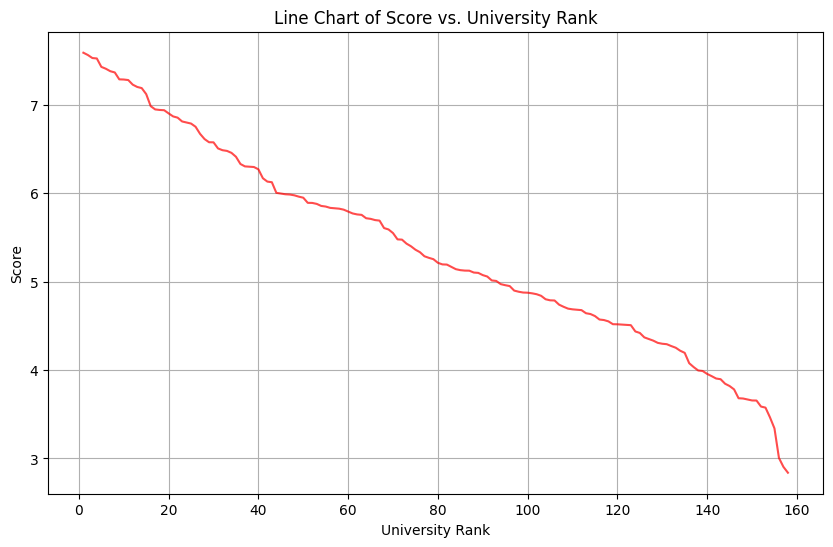

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(WorldHappiness_2015['Happiness Rank'], WorldHappiness_2015['Happiness Score'], color="red", alpha=0.7)

plt.xlabel("University Rank")  
plt.ylabel("Score")  
plt.title("Line Chart of Score vs. University Rank")

plt.grid()
plt.show()

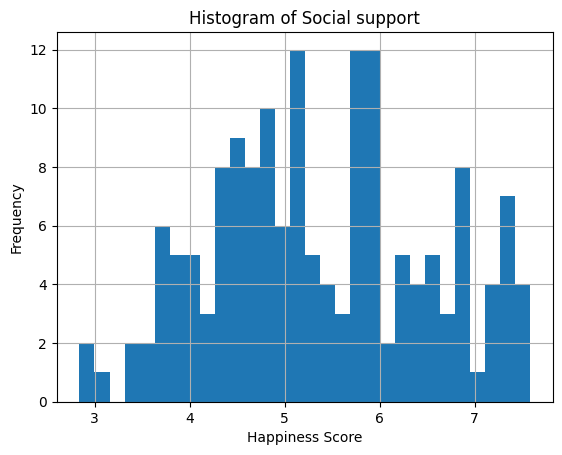

In [ ]:
#plt.figure(figsize=(18,12))
plt.hist(WorldHappiness_2015['Happiness Score'],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 30
        ) # bins = 6 means 6 bars
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

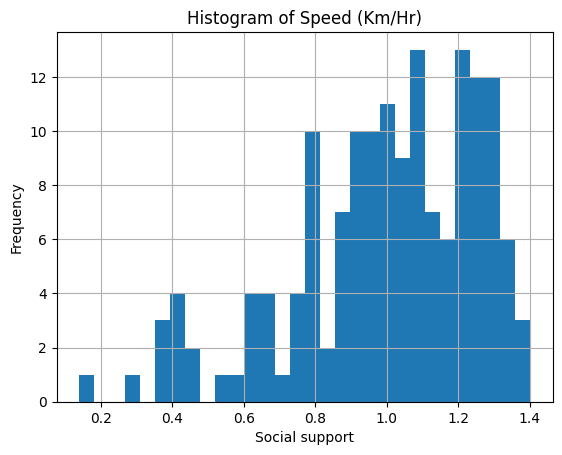

In [ ]:
#plt.figure(figsize=(18,12))
plt.hist(WorldHappiness_2015[WorldHappiness_2015['Social support'] > 0 ]['Social support'],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 30
        ) # bins = 6 means 6 bars
plt.xlabel('Social support')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Social support')
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.